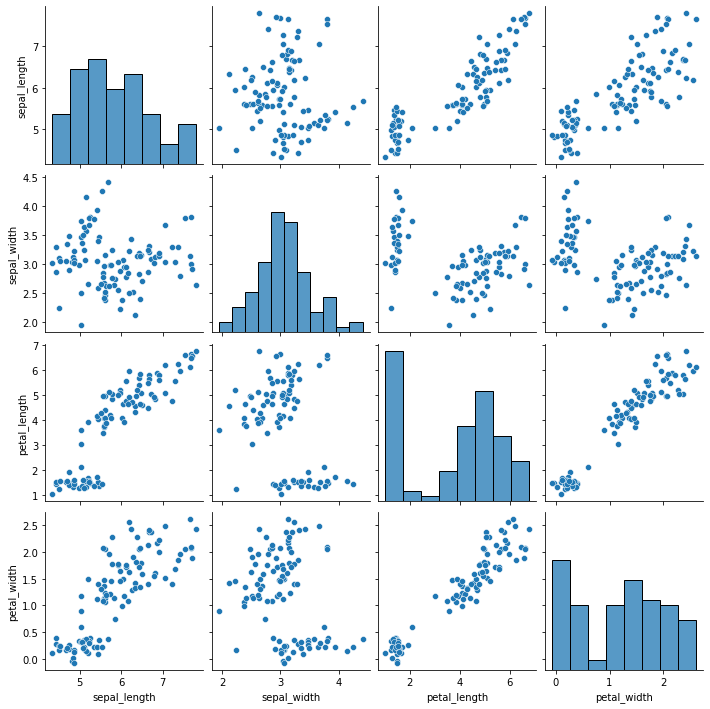

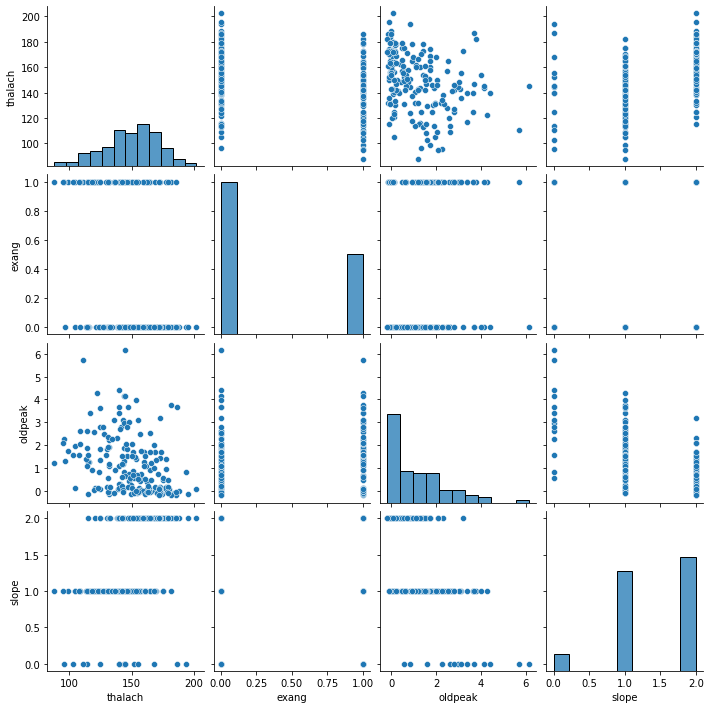

Iris correlation coefficient is :
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031792      0.880635     0.809915
sepal_width      -0.031792     1.000000     -0.285793    -0.267574
petal_length      0.880635    -0.285793      1.000000     0.958274
petal_width       0.809915    -0.267574      0.958274     1.000000
heart disease correlation coefficient is :
          thalach     exang   oldpeak     slope
thalach  1.000000 -0.360246 -0.351900  0.463824
exang   -0.360246  1.000000  0.279862 -0.314675
oldpeak -0.351900  0.279862  1.000000 -0.652509
slope    0.463824 -0.314675 -0.652509  1.000000
Iris data mean is :
sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64
heart disease mean is :
age          54.311321
sex           0.688679
cp            0.957547
trestbps    131.784610
chol        244.133256
fbs           0.132075
restecg       0.560386
thalach     149.647978
exang

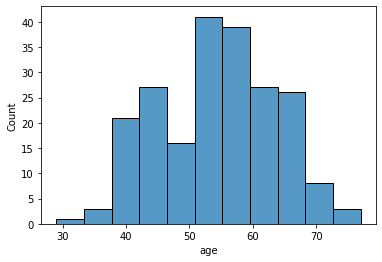

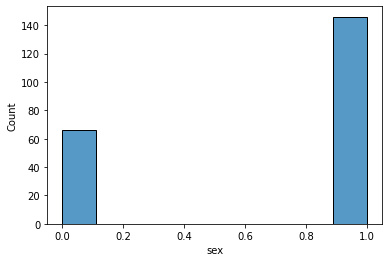

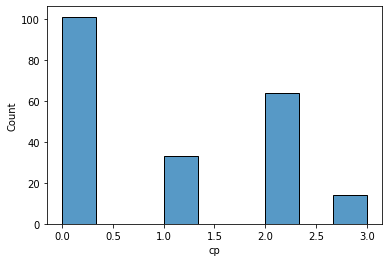

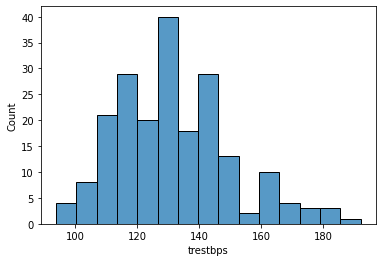

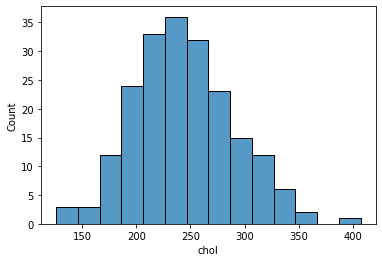

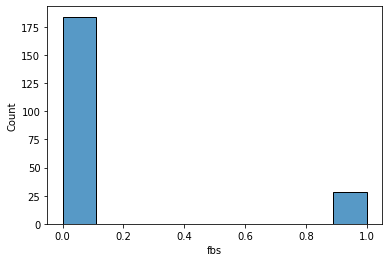

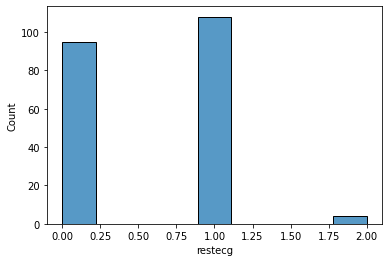

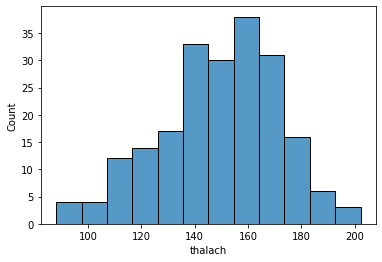

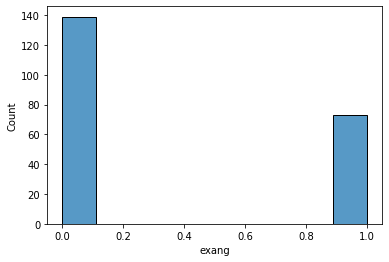

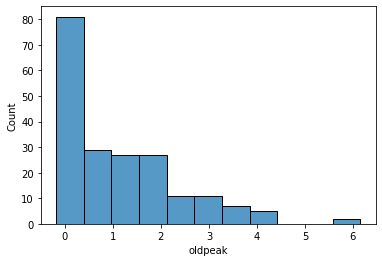

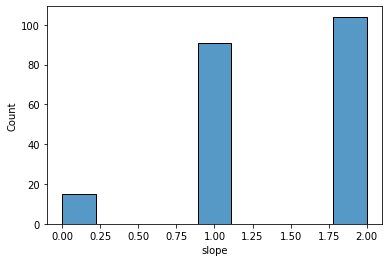

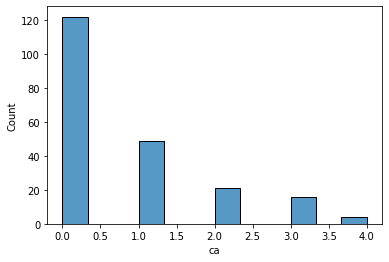

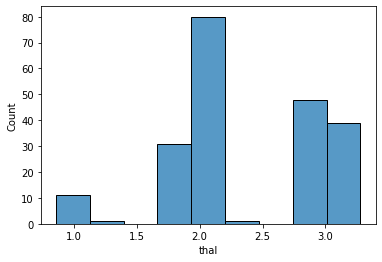

If delete the missing values
The optimal k obtained is:5,and the highest correctness is :1.0000


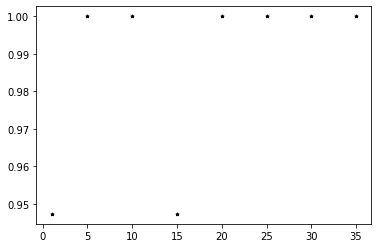

accuracy is : 1.0
AUC is : 1.0
F1 score is : 1.0
The optimal k obtained is:15,and the highest correctness is :0.6286


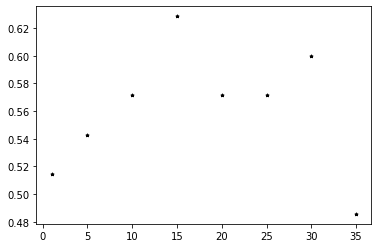

accuracy is : 0.7142857142857143
AUC is : 0.7124183006535947
F1 score is : 0.7121710526315789
If replace the missing values with their mean value
The optimal k obtained is:1,and the highest correctness is :0.9524


<ipython-input-1-5d69033877d0>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_replace_mean[i][np.isnan(iris_replace_mean[i])]=iris_mean[count];
<ipython-input-1-5d69033877d0>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_replace_mean[i][np.isnan(heart_replace_mean[i])]=heart_mean[count];


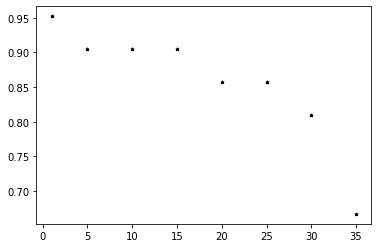

accuracy is : 0.8095238095238095
AUC is : 0.8917748917748917
F1 score is : 0.8518518518518517
The optimal k obtained is:10,and the highest correctness is :0.6744


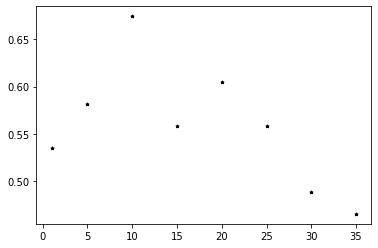

accuracy is : 0.6976744186046512
AUC is : 0.7083333333333334
F1 score is : 0.6916712630998345
After normalization:
The optimal k obtained is:5,and the highest correctness is :1.0000


/Users/jiaweiqian/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


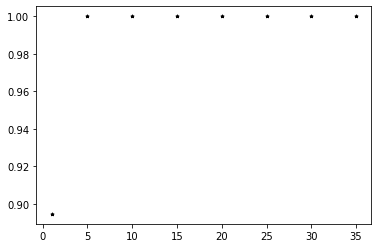

accuracy is : 1.0
AUC is : 1.0
F1 score is : 1.0
The optimal k obtained is:25,and the highest correctness is :0.8857


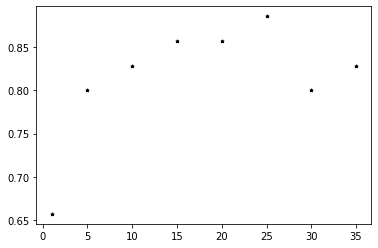

accuracy is : 0.7714285714285715
AUC is : 0.7745098039215688
F1 score is : 0.769736842105263


In [1]:
import pandas as pd;
import seaborn as sns;
from matplotlib import pyplot as plt;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


def main():
    #CM1:
    #reade the data of iris and plot it
    iris_data=pd.read_csv('iris_dataset_missing.csv', sep=',');
    sns.pairplot(iris_data);
    iris_title=iris_data.keys();
    plt.show();
    #read the data of heart disease and plot it, I choose thalach, exang, oldpeak, slope
    #thalach as features to be pairplot
    chosen_features=['thalach','exang','oldpeak','slope']
    heart_data=pd.read_csv('heart_disease_missing.csv', sep=',');
    sns.pairplot(heart_data,vars=chosen_features);
    heart_title=heart_data.keys();
    plt.show();
    #CM2:
    iris_corrmat=iris_data.corr();
    heart_corrmat=heart_data.loc[:,chosen_features].corr();
    print('Iris correlation coefficient is :');
    print(iris_corrmat)
    print('heart disease correlation coefficient is :');
    print(heart_corrmat)
    #mean
    iris_mean=iris_data.mean();
    heart_mean=heart_data.mean();
    #variance
    iris_var=iris_data.var();
    heart_var=heart_data.var();
    #skew
    iris_skew=iris_data.skew();
    heart_skew=heart_data.skew();
    #kurtosis
    iris_kurtosis=iris_data.kurtosis();
    heart_kurtosis = heart_data.kurtosis();
    #heart_chosen_kurtosis=heart_data.loc[:,chosen_features].kurtosis();
    print('Iris data mean is :');
    print(iris_mean);
    print('heart disease mean is :');
    print(heart_mean);
    print('Iris data variance is :');
    print(iris_var);
    print('heart disease variance is :');
    print(heart_var);
    print('Iris data skew is :');
    print(iris_skew);
    print('heart disease skew is :');
    print(heart_skew);
    print('Iris data kurtosis is :');
    print(iris_kurtosis);
    print('heart disease kurtosis is :');
    print(heart_kurtosis);
    #CM3
    #Part6 int type: age, sex, cp, fbs, exang, ca, target
    #      float type:trestbps, chol, restecg, thalach, oldpeak, slope, thal
    for i in heart_title[0:len(heart_title)-1]:
        sns.histplot(heart_data.loc[:,i]);
        plt.show()
    #CM5
    #Part7 Data cleaning
    #First I round the thal features into 1,2,3
    heart_data.thal=np.round(heart_data.thal)
    #Method 1: delete the missing values
    iris_delet_nan=iris_data.dropna(axis=0,how='any');
    heart_delete_nan=heart_data.dropna(axis=0,how='any');
    print('If delete the missing values');
    getknn(iris_delet_nan,heart_delete_nan);
    #Method 2: data processing missing values: replace them with their mean value
    iris_replace_mean=iris_data.copy();
    count=0;
    for i in iris_title[0:len(iris_title)-1]:
        iris_replace_mean[i][np.isnan(iris_replace_mean[i])]=iris_mean[count];
        count=count+1;
    heart_replace_mean=heart_data.copy();
    count=0;
    for i in heart_data.keys():
        heart_replace_mean[i][np.isnan(heart_replace_mean[i])]=heart_mean[count];
        count=count+1;
    print('If replace the missing values with their mean value');
    getknn(iris_replace_mean,heart_replace_mean);

    #Part 5: Normalization
    for i in heart_title[0:len(heart_title)-1]:
        heart_delete_nan.loc[:,i]=(heart_delete_nan.loc[:,i]-heart_delete_nan.loc[:,i].min())/(heart_delete_nan.loc[:,i].max()-heart_delete_nan.loc[:,i].min());

    for i in iris_title[0:len(iris_title)-1]:
        iris_delet_nan.loc[:,i]=(iris_delet_nan.loc[:,i]-iris_delet_nan.loc[:,i].min())/(iris_delet_nan.loc[:,i].max()-iris_delet_nan.loc[:,i].min());
    print('After normalization:')
    getknn(iris_delet_nan,heart_delete_nan);
'''
Knn related functions
'''
#This function takes two dataset as input and will performe knn separately on these two datasets
def getknn(iris_modified,heart_modified):
    #performe the knn on iris dataset
    #we need to covert the label to float or int first.
    iris_title = iris_modified.keys();
    heart_title=heart_modified.keys();
    x=iris_modified.loc[:,iris_title[0:len(iris_title)-1]];
    y=[];
    label_type=[];
    for i in iris_modified.loc[:,iris_title[len(iris_title)-1]]:
        if i not in label_type:
            label_type.append(i);
        y.append(label_type.index(i));
    knn_classifier(x,y);
    #performe the knn on heart dataset
    x=heart_modified.loc[:,heart_title[0:len(heart_title)-1]];
    y=heart_modified.loc[:,heart_title[len(heart_title)-1]]
    knn_classifier(x,y);

#This function performe knn classification and calculated the optimal k value, then use it 
#to train the data again to calculate the accuaracy, AUC and F1 score
def knn_classifier(x,y):
    #Part1 split the data into training 60% and testing set 20% and validation set 20%
    X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=275);
    x_train,x_valid,y_train,y_valid=train_test_split(X_train, Y_train, test_size=0.25, random_state=275);
    #Part2 and 3 Find the optimal k value using validation set and training set
    optimal_k = -1
    optimal_correct_rate = 0
    k_list=[1,5,10,15,20,25,30,35];
    correct_list=[];
    for i in k_list:
        knn_clf = KNeighborsClassifier(n_neighbors=i)
        knn_clf.fit(x_train, y_train)
        correctness = knn_clf.score(x_valid, y_valid)
        if correctness > optimal_correct_rate:
            optimal_correct_rate = correctness
            optimal_k = i
        correct_list.append(correctness);
    print('The optimal k obtained is:%d,and the highest correctness is :%.4f' % (optimal_k, optimal_correct_rate));
    #plot the k vs the accuracy on validation set
    plt.scatter(k_list, correct_list, marker='*', s=10, c='black');
    plt.show();
    #Part4: use optimal parameter to do the actual training
    knn_clf = KNeighborsClassifier(n_neighbors=optimal_k,weights='distance')
    #,weights="distance"
    knn_clf.fit(x_train, y_train);
    #calculate accuracy
    accuracy=metrics.accuracy_score(y_test, knn_clf.predict(x_test));
    print('accuracy is :',accuracy)
    #calculate AUC
    #For iris data
    if type(y)==type([]):
        AUC= metrics.roc_auc_score(np.array(y_test), knn_clf.predict_proba(x_test),multi_class='ovr');
    #For heart_disease data
    else:
        AUC = metrics.roc_auc_score(y_test, knn_clf.predict(x_test));
    print('AUC is :', AUC);
    #calculate f1 score
    F1_score=metrics.f1_score(y_test, knn_clf.predict(x_test),average='macro');
    print('F1 score is :', F1_score);

if __name__ == '__main__':
    main();